# Лабораторная работа №5
Работу выполнили: **Созинов Кирилл** и **Хорев Егор**, 19ПМИ-2

Как всегда, в начале загружаем необходимые модули и датасет, с которым будем работать:

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
df = pd.read_csv('C:/Users/ciril/Datasets/lab5/responses.csv')

In [4]:
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


Итак, мы имеем опросник 1010 студентов по 150 вопросам, сгруппированным по различным категориям. Имеются как числовые, так и категориальные признаки.

Проведем небольшой начальный анализ:

In [4]:
df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


По строке *count* видно, что в каждом из полей есть по несколько пропущенных значений, что необходимо исправить для работы алгоритмов, поэтому попробуем удалить строки с пропущеннными элементами:

In [5]:
df = df.dropna()
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,20.0,186.0,77.0,1.0,male,right handed,secondary school,no,city,block of flats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,5.0,3.0,4.0,1.0,2.0,3.0,2.0,3.0,3.0,4.0,...,22.0,175.0,60.0,1.0,male,right handed,secondary school,no,city,block of flats
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


Видим, что была удалена примерно треть датасета, значит такой вариант нам не подойдет. Заменим пропуски наиболее популярными значениями (модами):

In [2]:
df = pd.read_csv('C:/Users/ciril/Datasets/lab5/responses.csv')
df.fillna(df.mode().iloc[0], inplace=True)
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


Проверяем, везде ли теперь отсутствуют непустые ячейки:

In [7]:
df.count()

Music                       1010
Slow songs or fast songs    1010
Dance                       1010
Folk                        1010
Country                     1010
                            ... 
Left - right handed         1010
Education                   1010
Only child                  1010
Village - town              1010
House - block of flats      1010
Length: 150, dtype: int64

Все было сделано правильно, значит теперь можно без проблем пользоваться алгоритмами.

## Задание 1

В качестве первого задания нужно оценить музыкальные предпочтения студентов. 

In [66]:
df_music = df.iloc[:, :19]
df_music

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,4.0,3.0,3.0,2.0
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0,4.0,1.0
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,2.0,3.0,3.0,2.0,2.0,5.0,1.0,1.0,1.0
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,1.0,2.0,2.0,3.0,2.0,5.0,2.0,2.0,1.0


In [9]:
df_music.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,4.732673,3.327723,3.112871,2.287129,2.122772,2.956436,2.762376,3.473267,3.769307,2.357426,2.444554,2.914851,2.771287,2.761386,3.140594,2.829703,2.835644,2.329703,2.138614
std,0.663222,0.833232,1.168268,1.136271,1.073501,1.248223,1.259639,1.160029,1.185161,1.372955,1.302356,1.374653,1.210365,1.254326,1.233026,1.342567,1.324735,1.324171,1.184051
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
df_music['Music'].value_counts()

5.0    825
4.0    129
3.0     36
2.0     11
1.0      9
Name: Music, dtype: int64

Можно бы было вручную попробовать выделить группы студентов по музыкальным интересам, но по 19 признакам это не так просто, поэтому воспользуемся алгоритмом кластеризации *Kmeans* для этой задачи:

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(df_music)
kmeans.labels_

array([1, 5, 7, ..., 9, 9, 6])

In [5]:
kmeans.inertia_

17617.297696242087

Построим *каменистую осыпь* для определения наилучшего количества кластеров:

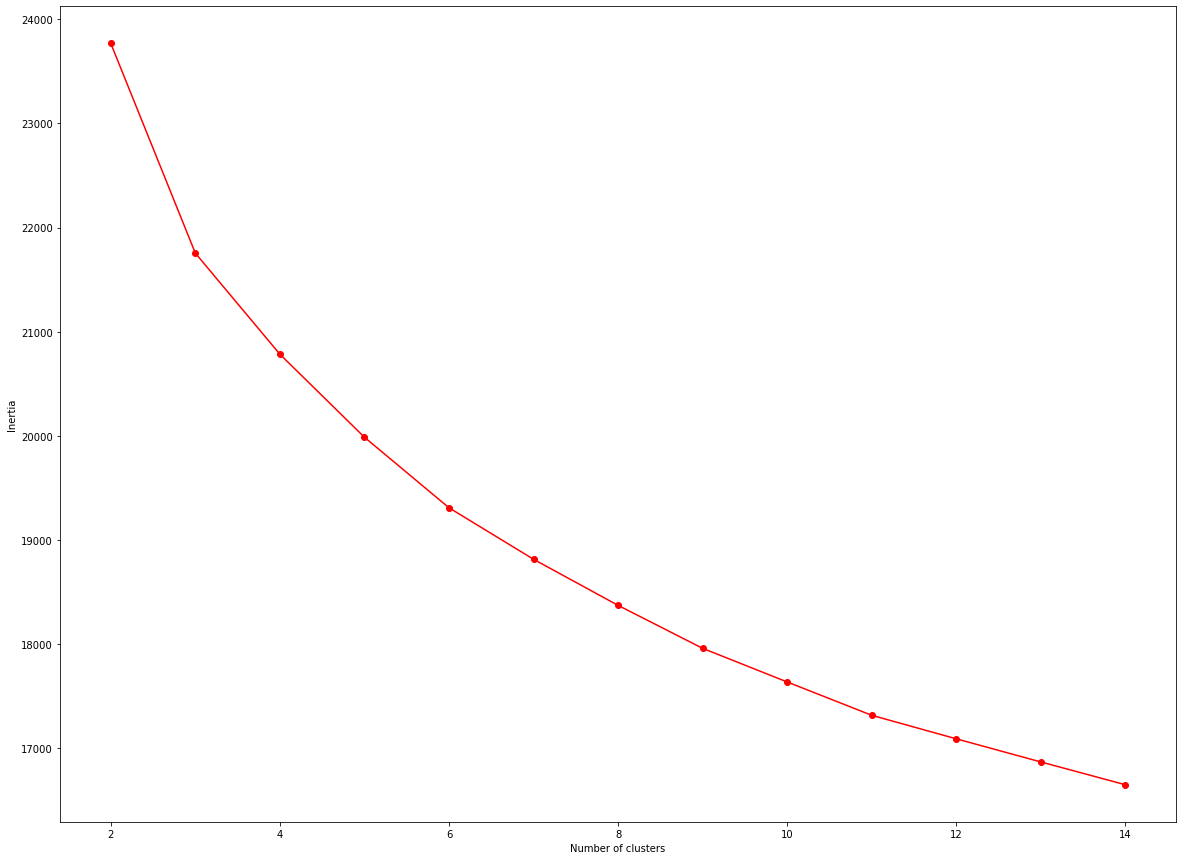

In [6]:
x = list(range(2, 15))
inertia = []
for k in x:
    kmeans = KMeans(n_clusters=k).fit(df_music)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 15))
plt.plot(x, inertia, '-r')
plt.plot(x, inertia, 'or')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Впринципе 10 кластеров является более-менее оптимальным количеством)

Попробуем посжимать данные для визуализации:

In [7]:
kmeans = KMeans(n_clusters=10).fit(df_music)
labels = list(set(kmeans.labels_))

In [68]:
labels = pd.Series(kmeans.labels_)
df_music['labels'] = labels

Здесь в датафрейм был добавлен столбец меток, чтобы визуализация после понижения размерности получилась более наглядной. Для понижения размерности был выбран алгоритм *tSNE*, т.к. это более современный алгоритм по сравнению с тем же *PCA*, и он больше подходит для кластеризации и визуализации в особенности.

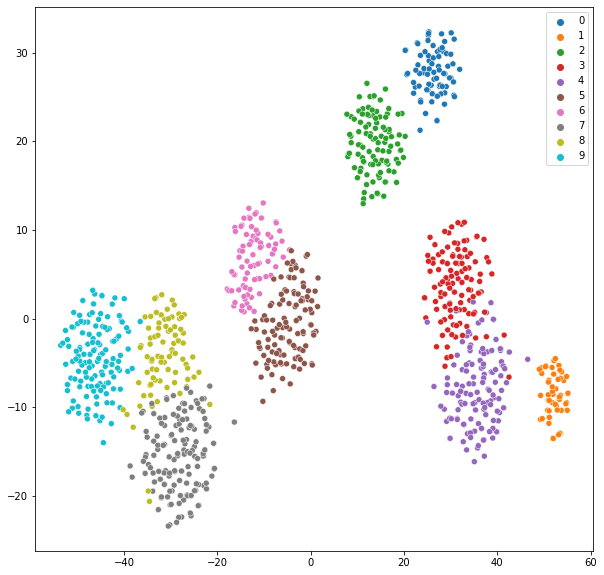

In [69]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(df_music)
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
plt.figure(figsize=(10, 10))
sns.scatterplot(data=transformed, x=x_axis, y=y_axis, hue=kmeans.labels_, palette="tab10")
plt.show()

При помощи следующего куска кода уже можно примерно интерпретировать группы студентов по музыкальным предпочтениям. Например, 2, 5 и 9 группы предпочитают рок и его различные поджанры, а 8 группа более спокойную и мелодичную музыку.

In [10]:
for l in range(len(set(labels))):
    print(f"\tMusic group {l}:")
    print(df_music.loc[df_music['labels'] == l].loc[:, 'Slow songs or fast songs':'Opera'].mean().sort_values(ascending=False)[:5])
    print('\n')

	Music group 0:
Classical music    4.373333
Rock               4.266667
Pop                4.200000
Latino             4.146667
Dance              4.133333
dtype: float64


	Music group 1:
Pop                         3.431373
Slow songs or fast songs    2.901961
Rock                        2.627451
Musical                     2.470588
Dance                       2.450980
dtype: float64


	Music group 2:
Rock           4.660194
Rock n roll    4.174757
Punk           4.097087
Alternative    4.009709
Reggae, Ska    3.834951
dtype: float64


	Music group 3:
Techno, Trance              3.919643
Pop                         3.919643
Dance                       3.821429
Hiphop, Rap                 3.812500
Slow songs or fast songs    3.500000
dtype: float64


	Music group 4:
Hiphop, Rap                 4.080
Dance                       3.664
Pop                         3.600
Slow songs or fast songs    3.560
Techno, Trance              2.760
dtype: float64


	Music group 5:
Rock               

Теперь ответим на вопрос какие жанры предпочитает наибольшее количество студентов.

In [14]:
df_music.loc[:, 'Dance':'Opera'].mean().sort_values(ascending=False)[:8]

Rock               3.769307
Pop                3.473267
Rock n roll        3.140594
Dance              3.112871
Classical music    2.956436
Hiphop, Rap        2.914851
Latino             2.835644
Alternative        2.829703
dtype: float64

Не удивительно, что в среднем студенты предпочитают рок, поп и танцевальную музыку. Хотя довольно высокая оценка классической музыки заставляет задуматься...

Теперь определим влияет ли музыкальное предпочтение на кинематографические предпочтения.
Создадим датафрейм с оценками музыки и кино, плюс добавим наши найденные метки

In [12]:
df_music_and_movies = df.iloc[:, :31]
df_music_and_movies['labels'] = labels
df_music_and_movies

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,labels
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,6
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,5
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0,6
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,4.0,2.0,5.0,5.0,2.0,1.0,4.0,0
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,5.0,1.0,5.0,5.0,1.0,5.0,5.0,2.0,5.0,4
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,3.0,5.0,2.0,1.0,4.0,4.0,3.0,1.0,3.0,6
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,5.0,3.0,1.0,2.0,5.0,5.0,3.0,1.0,4.0,9


Проведем похожую процедуру и по каждой музыкальной группе выведем наиболее предпочтительные жанры кино:

In [16]:
for l in range(len(set(labels))):
    print(f"\tMusic group {l}:")
    print(df_music_and_movies.loc[df_music_and_movies['labels'] == l].loc[:, 'Horror':'Action'].mean().sort_values(ascending=False)[:5])
    print('\n')

	Music group 0:
Comedy         4.148148
Documentary    3.506173
Thriller       3.395062
War            3.283951
Animated       3.259259
dtype: float64


	Music group 1:
Comedy                 4.531746
Animated               4.071429
Fantasy/Fairy tales    3.952381
Action                 3.809524
Documentary            3.634921
dtype: float64


	Music group 2:
Comedy                 4.512195
Fantasy/Fairy tales    4.243902
Animated               4.231707
Romantic               4.073171
Documentary            4.073171
dtype: float64


	Music group 3:
Comedy      4.597826
Action      3.554348
Romantic    3.369565
Thriller    3.163043
Animated    3.163043
dtype: float64


	Music group 4:
Comedy                 4.755396
Romantic               4.187050
Fantasy/Fairy tales    4.086331
Animated               3.913669
Documentary            3.258993
dtype: float64


	Music group 5:
Comedy                 4.659420
Fantasy/Fairy tales    3.884058
Animated               3.884058
Documentary       

Во-первых сразу можно заметить, что во всех группах комедии самые предпочтительные. Вспоминая про те же группы 2, 5 и 9 вторую и третью строчки в них занимают мультфильмы и документалки. В то же время 3 музыкальная группа, которая все жанры оценила невысоко и примерно одинаково кроме комедий любит боевики.

## Задание 2

Теперь оценим и проанализируем личные предпочтения:
<br>Я выбрал 3 личных предпочтения, а именно *Rock*, *Rock n roll* и *Action movies*. Студентов с такими же предпочтениями я выбирал по оценке 5 по этим жанрам:

In [263]:
preferences1 = df_music_and_movies[(df_music_and_movies['Rock'] == 5) & (df_music_and_movies['Rock n roll'] == 5) & (df_music_and_movies['Action'] == 5)]
preferences1

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,labels
46,5.0,3.0,4.0,3.0,4.0,1.0,5.0,5.0,5.0,3.0,...,5.0,3.0,5.0,1.0,3.0,2.0,1.0,1.0,5.0,7
52,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0
84,5.0,3.0,1.0,1.0,4.0,5.0,5.0,1.0,5.0,5.0,...,4.0,1.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5
88,5.0,5.0,5.0,1.0,1.0,5.0,2.0,5.0,5.0,1.0,...,5.0,2.0,2.0,1.0,3.0,3.0,4.0,1.0,5.0,3
102,5.0,3.0,1.0,2.0,3.0,5.0,4.0,1.0,5.0,2.0,...,5.0,4.0,5.0,4.0,5.0,5.0,5.0,2.0,5.0,5
120,5.0,5.0,4.0,1.0,2.0,4.0,4.0,2.0,5.0,5.0,...,5.0,4.0,2.0,5.0,4.0,4.0,5.0,3.0,5.0,5
201,5.0,3.0,2.0,4.0,3.0,3.0,3.0,5.0,5.0,1.0,...,5.0,5.0,4.0,4.0,5.0,5.0,5.0,2.0,5.0,7
210,5.0,4.0,5.0,5.0,5.0,5.0,1.0,4.0,5.0,4.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0
211,5.0,4.0,5.0,1.0,2.0,2.0,5.0,5.0,5.0,1.0,...,5.0,5.0,3.0,3.0,5.0,1.0,3.0,2.0,5.0,7
225,5.0,4.0,2.0,3.0,2.0,4.0,4.0,2.0,5.0,2.0,...,4.0,2.0,5.0,5.0,2.0,4.0,5.0,3.0,5.0,2


В датасете было найден 41 студент с оценками 5 по выбранным мной предпочтениям.

Теперь посмотрим на другие предпочтения: (из списка были убран столбец с метками и три выбранных мной предпочтения, у которых все значения 5):

In [264]:
preferences1.mean().sort_values(ascending=False)[4:10]

Movies                 4.926829
Comedy                 4.731707
Animated               4.317073
Documentary            4.292683
Fantasy/Fairy tales    4.195122
Thriller               4.146341
dtype: float64

Из интересного тут можно выделить огромную любовь к фильмам впринципе (из 41 студента по одной тройке и четверке), мультфильмам и документальным фильмам, хотя присоединиться к ним я не совсем могу. 

Теперь оценим, какие личностные характеристики и мнения наиболее согласуются с этой группой студентов:

In [14]:
df_mmt = df.iloc[:, :31]
df_mmt = df_mmt.join(df.iloc[:, 76:133])
df_mmt

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,2.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,4.0,most of the day
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,few hours a day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,few hours a day
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,4.0,4.0,3.0,5.0,3.0,1.0,3.0,4.0,3.0,less than an hour a day
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,3.0,1.0,3.0,2.0,3.0,5.0,1.0,4.0,5.0,most of the day
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,3.0,2.0,2.0,4.0,1.0,5.0,3.0,3.0,3.0,most of the day


In [15]:
preferences1_adj = df_mmt[(df_mmt['Rock'] == 5) & (df_mmt['Rock n roll'] == 5) & (df_mmt['Action'] == 5)]
preferences1_adj

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage
46,5.0,3.0,4.0,3.0,4.0,1.0,5.0,5.0,5.0,3.0,...,4.0,5.0,3.0,4.0,2.0,5.0,5.0,4.0,2.0,few hours a day
52,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,2.0,3.0,5.0,3.0,1.0,4.0,4.0,3.0,1.0,few hours a day
84,5.0,3.0,1.0,1.0,4.0,5.0,5.0,1.0,5.0,5.0,...,5.0,4.0,5.0,4.0,3.0,5.0,5.0,4.0,1.0,few hours a day
88,5.0,5.0,5.0,1.0,1.0,5.0,2.0,5.0,5.0,1.0,...,2.0,1.0,1.0,3.0,4.0,5.0,1.0,5.0,5.0,few hours a day
102,5.0,3.0,1.0,2.0,3.0,5.0,4.0,1.0,5.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,few hours a day
120,5.0,5.0,4.0,1.0,2.0,4.0,4.0,2.0,5.0,5.0,...,4.0,2.0,3.0,4.0,1.0,1.0,1.0,2.0,5.0,most of the day
201,5.0,3.0,2.0,4.0,3.0,3.0,3.0,5.0,5.0,1.0,...,4.0,4.0,2.0,3.0,4.0,3.0,3.0,4.0,4.0,few hours a day
210,5.0,4.0,5.0,5.0,5.0,5.0,1.0,4.0,5.0,4.0,...,3.0,5.0,4.0,5.0,4.0,5.0,4.0,5.0,3.0,few hours a day
211,5.0,4.0,5.0,1.0,2.0,2.0,5.0,5.0,5.0,1.0,...,4.0,4.0,2.0,4.0,3.0,4.0,4.0,4.0,1.0,few hours a day
225,5.0,4.0,2.0,3.0,2.0,4.0,4.0,2.0,5.0,2.0,...,4.0,4.0,2.0,3.0,3.0,4.0,3.0,3.0,3.0,few hours a day


Имеем следующие средние оценки:

In [265]:
preferences1_adj.loc[:, 'Daily events':'Internet usage'].mean().sort_values(ascending=False)[:6]

C:\Users\ciril\AppData\Local\Temp/ipykernel_15468/423513408.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  preferences1_adj.loc[:, 'Daily events':'Internet usage'].mean().sort_values(ascending=False)[:6]


Borrowed stuff           4.268293
Judgment calls           4.219512
Reliability              4.073171
Keeping promises         4.073171
Friends versus money     4.048780
Compassion to animals    3.902439
dtype: float64

Небольшие расшифровики:
- Borrowed stuff -- I look after things I have borrowed from others.
- Judgment calls -- I can tell if people listen to me or not when I talk to them.
- Reliability -- I am reliable at work and always complete all tasks given to me.
- Keeping promises -- I always keep my promises.
- Friends versus money -- I would rather have lots of friends than lots of money

Получается студенты из этой группы отличные друзья, на которых можно положиться, доверить им что-либо. Они с полной ответственностью отнесутся к этому.

Повторим это задание с другими выбранными предпочтениями:

In [16]:
preferences2 = df_mmt[(df_mmt['Pop'] == 5) & (df_mmt['Dance'] == 5) & (df_mmt['Thriller'] == 5)]
preferences2

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage
52,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,2.0,3.0,5.0,3.0,1.0,4.0,4.0,3.0,1.0,few hours a day
54,5.0,3.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,4.0,...,3.0,5.0,4.0,3.0,3.0,3.0,5.0,3.0,3.0,few hours a day
62,5.0,3.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,...,3.0,5.0,5.0,3.0,1.0,3.0,5.0,4.0,1.0,few hours a day
83,5.0,3.0,5.0,1.0,2.0,4.0,4.0,5.0,5.0,3.0,...,3.0,4.0,1.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day
88,5.0,5.0,5.0,1.0,1.0,5.0,2.0,5.0,5.0,1.0,...,2.0,1.0,1.0,3.0,4.0,5.0,1.0,5.0,5.0,few hours a day
103,5.0,5.0,5.0,2.0,2.0,3.0,4.0,5.0,1.0,1.0,...,5.0,4.0,1.0,4.0,4.0,1.0,4.0,5.0,1.0,few hours a day
115,5.0,4.0,5.0,2.0,2.0,5.0,4.0,5.0,5.0,2.0,...,4.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,5.0,few hours a day
146,5.0,3.0,5.0,2.0,1.0,4.0,1.0,5.0,4.0,3.0,...,5.0,3.0,3.0,3.0,5.0,2.0,3.0,2.0,2.0,few hours a day
211,5.0,4.0,5.0,1.0,2.0,2.0,5.0,5.0,5.0,1.0,...,4.0,4.0,2.0,4.0,3.0,4.0,4.0,4.0,1.0,few hours a day
244,5.0,3.0,5.0,2.0,4.0,3.0,5.0,5.0,5.0,2.0,...,4.0,2.0,1.0,4.0,1.0,5.0,2.0,3.0,3.0,most of the day


In [269]:
preferences2.mean().sort_values(ascending=False)[:10]

C:\Users\ciril\AppData\Local\Temp/ipykernel_15468/2046438239.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  preferences2.mean().sort_values(ascending=False)[:10]


Music                      5.000000
Dance                      5.000000
Comedy                     5.000000
Thriller                   5.000000
Pop                        5.000000
Movies                     5.000000
Action                     4.578947
Judgment calls             4.368421
Animated                   4.315789
Appearence and gestures    4.263158
dtype: float64

Получили всего 19 студентов, которые также проставили по 5 баллов комедиям. Также очень положительно относятся к боевикам.

In [38]:
preferences2.loc[:, 'Daily events':'Internet usage'].mean().sort_values(ascending=False)[:6]

C:\Users\ciril\AppData\Local\Temp/ipykernel_9284/1051807283.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  preferences2.loc[:, 'Daily events':'Internet usage'].mean().sort_values(ascending=False)[:6]


Judgment calls             4.368421
Appearence and gestures    4.263158
Friends versus money       4.210526
Keeping promises           4.210526
Empathy                    4.210526
Borrowed stuff             4.157895
dtype: float64

Тут еще добавлю несколько пояснений:
- Appearence and gestures -- I am well mannered and I look after my appearance
- Empathy -- I am emphatetic person.

По этим данным выходит, что эта группа студентов более чуткая и внимательная за своей внешностью, также уважает дружбу.

## Задание 3

Теперь произведём кластеризацию признаков персональных характеристик/мнений.

In [250]:
df_pt = df.iloc[:, 76:133]

Есть небольшая проблема, которая заключается в трёх категориальных признаках среди всех 57, а именно:
- **32** *Timekeeping.*: I am often early. - I am always on time. - I am often running late. (categorical)
- **33** *Do you lie to others?*: Never. - Only to avoid hurting someone. - Sometimes. - Everytime it suits me. (categorical)
- **57** *How much time do you spend online?*: No time at all - Less than an hour a day - Few hours a day - Most of the day (categorical)

In [251]:
df_pt[['Punctuality', 'Lying', 'Internet usage']]

,Punctuality,Lying,Internet usage
0,i am always on time,never,few hours a day
1,i am often early,sometimes,few hours a day
2,i am often running late,sometimes,few hours a day
3,i am often early,only to avoid hurting someone,most of the day
4,i am always on time,everytime it suits me,few hours a day
...,...,...,...
1005,i am often running late,everytime it suits me,few hours a day
1006,i am often early,sometimes,less than an hour a day
1007,i am often running late,only to avoid hurting someone,most of the day
1008,i am often running late,sometimes,most of the day


Т.к. указанные для работы алгоритмы в первоначальном своем виде работают с числовыми признаками и категориальных признаков мало, было принято решение приблизительно преобразовать их к числовому виду, похожему на остальные признаки следующим образом:
- **32** *Timekeeping.*: I am often early.***(1)*** - I am always on time.***(3)*** - I am often running late.(***5***) (integer)
- **33** *Do you lie to others?*: Never.***(1)*** - Only to avoid hurting someone.***(2)*** - Sometimes.***(4)*** - Everytime it suits me.***(5)*** (integer)
- **57** *How much time do you spend online?*: No time at all ***(1)*** - Less than an hour a day ***(2)*** - Few hours a day - ***(4)*** Most of the day ***(5)*** (integer)

In [252]:
cols = ['Punctuality', 'Lying', 'Internet usage']
df_pt['Punctuality'] = df_pt['Punctuality'].replace(['i am often early', 'i am always on time', 'i am often running late'], [1.0, 3.0, 5.0])
df_pt['Lying'] = df_pt['Lying'].replace(['never', 'only to avoid hurting someone', 'sometimes', 'everytime it suits me'], [1.0, 2., 4., 5.])
df_pt['Internet usage'] = df_pt['Internet usage'].replace(['no time at all', 'less than an hour a day', 'few hours a day', 'most of the day'], [1., 2., 4., 5.])
df_pt[cols]

,Punctuality,Lying,Internet usage
0,3.0,1.0,4.0
1,1.0,4.0,4.0
2,5.0,4.0,4.0
3,1.0,2.0,5.0
4,3.0,5.0,4.0
...,...,...,...
1005,5.0,5.0,4.0
1006,1.0,4.0,2.0
1007,5.0,2.0,5.0
1008,5.0,4.0,5.0


### kMeans

Начнем с *kMeans*:

In [20]:
kmeans_pt = KMeans(n_clusters=10).fit(df_pt)
kmeans_pt.labels_

array([6, 4, 3, ..., 5, 5, 6])

Опять построим каменистую осыпь для определения наилучшего количества кластеров:

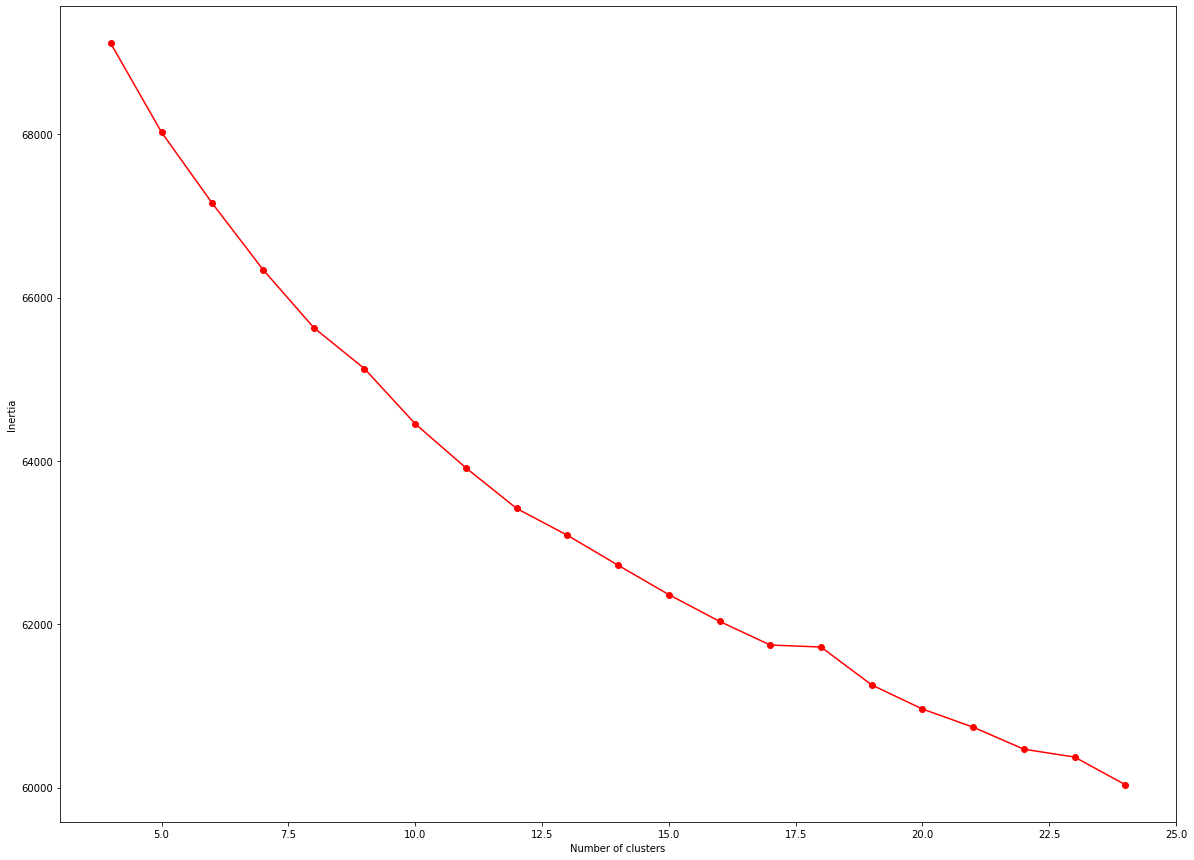

In [21]:
x = list(range(4, 25))
inertia = []
for k in x:
    kmeans_pt = KMeans(n_clusters=k).fit(df_pt)
    inertia.append(kmeans_pt.inertia_)

plt.figure(figsize=(20, 15))
plt.plot(x, inertia, '-r')
plt.plot(x, inertia, 'or')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

16 показывает себя как наилучшее значение

In [225]:
kmeans_pt = KMeans(n_clusters=16).fit(df_pt)
kmeans_pt.labels_

array([ 9, 12, 15, ...,  1,  1,  6])

Далее будет использоваться одна из метрик, подходящих для определения качества модели без знания настоящего разбиения на кластеры (true_labels). Называется она **Silhouette Coefficient**. Реализована в sklearn.

In [226]:
metrics.silhouette_score(df_pt, kmeans_pt.labels_, metric='euclidean')

0.024380863418416682

### DBSCAN

In [24]:
from sklearn.cluster import DBSCAN

In [37]:
dbscan = DBSCAN(eps=0.01, min_samples=3)
dbscan.fit(df_pt)
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

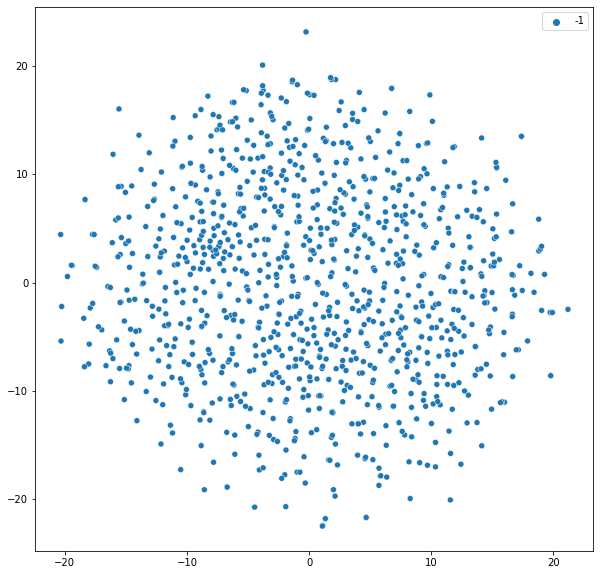

In [38]:
tsne_model = TSNE(learning_rate=100)
transformed = tsne_model.fit_transform(df_pt)
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
plt.figure(figsize=(10, 10))
sns.scatterplot(data=transformed, x=x_axis, y=y_axis, hue=dbscan.labels_, palette="tab10")
plt.show()

In [117]:
'''
scaler = StandardScaler()
df_scaled=scaler.fit_transform(df_pt)
df_scaled.mean(axis=0)
pd.DataFrame(df_scaled).describe()
'''

'\nscaler = StandardScaler()\ndf_scaled=scaler.fit_transform(df_pt)\ndf_scaled.mean(axis=0)\npd.DataFrame(df_scaled).describe()\n'

In [217]:
dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan.fit(df_pt)
pd.Series(dbscan.labels_).value_counts()

-1    1010
dtype: int64

In [218]:
'''
eps = [float(x) for x in np.linspace(start = 0.1, stop = 1.5, num = 20)]
min_samples = [int(x) for x in np.linspace(start = 2, stop = 15, num = 13)]
#x = list(range(2, 25))
metric_values = []
for k in eps:
    for l in min_samples:
        dbscan = DBSCAN(eps=k, min_samples=l)
        dbscan.fit(df_pt) #fit_trasnform
        metric_values.append(metrics.silhouette_score(df_pt, dbscan.labels_, metric='euclidean'))
'''

"\neps = [float(x) for x in np.linspace(start = 0.1, stop = 1.5, num = 20)]\nmin_samples = [int(x) for x in np.linspace(start = 2, stop = 15, num = 13)]\n#x = list(range(2, 25))\nmetric_values = []\nfor k in eps:\n    for l in min_samples:\n        dbscan = DBSCAN(eps=k, min_samples=l)\n        dbscan.fit(df_pt) #fit_trasnform\n        metric_values.append(metrics.silhouette_score(df_pt, dbscan.labels_, metric='euclidean'))\n"

Для нашего датасета не получилось ни в каком виде воспользоваться алгоритмом DBSCAN, видимо данные слишком сгруппированы и провести кластеризацию он не может.

### Hierarchical Clustering

In [124]:
from sklearn.cluster import AgglomerativeClustering

In [187]:
ac_model = AgglomerativeClustering(n_clusters = 12, linkage = 'ward')
ac_model.fit(df_pt)
ac_model.labels_
pd.Series(ac_model.labels_).value_counts()

1     184
2     160
0     103
4     102
3      89
6      78
8      57
7      54
10     51
5      50
11     44
9      38
dtype: int64

Для подбора оптимального количества кластеров для этого алгоритма я воспользовался уже описанной метрикой:

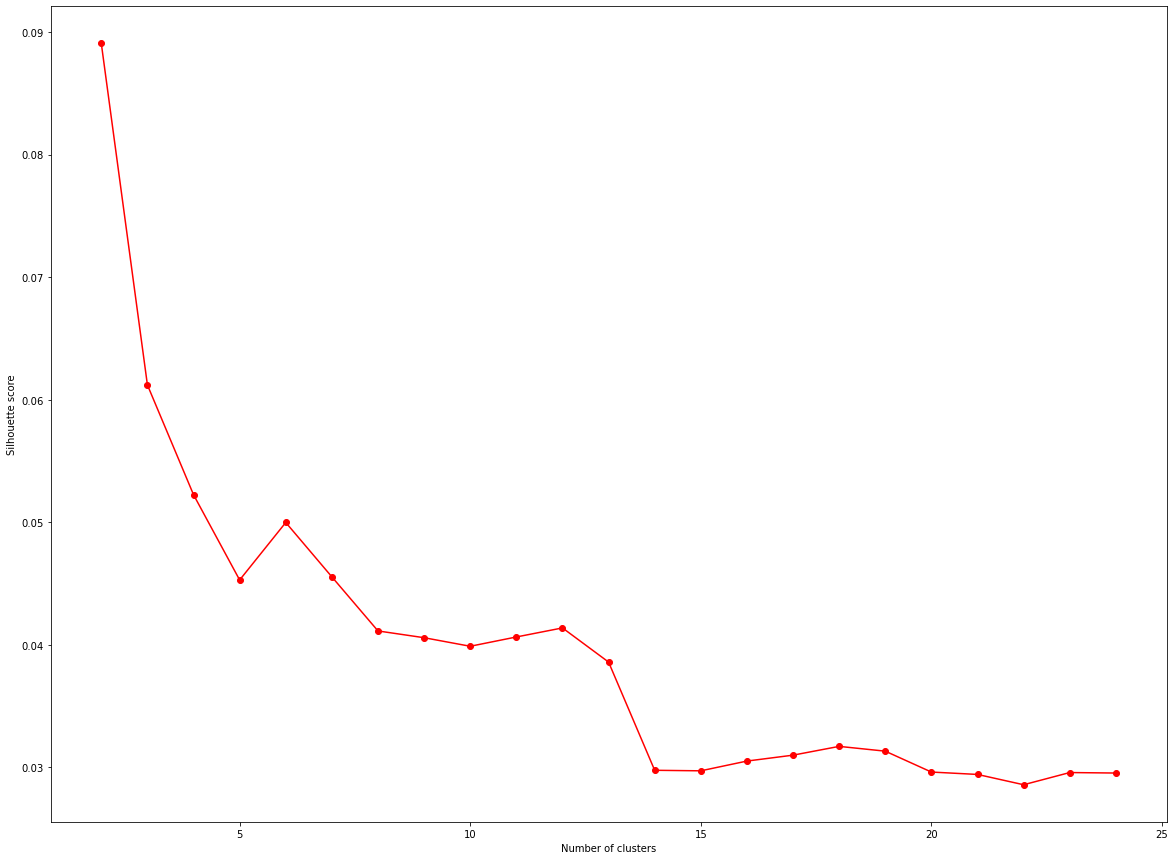

In [189]:
x = list(range(2, 25))
metric_values = []
for k in x:
    ac_model = AgglomerativeClustering(n_clusters = k)
    ac_model.fit(df_pt) #fit_trasnform
    item = metrics.silhouette_score(df_pt, ac_model.labels_, metric='euclidean')
    metric_values.append(item)

plt.figure(figsize=(20, 15))
plt.plot(x, metric_values, '-r')
plt.plot(x, metric_values, 'or')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

Чем больше значения данного коэффициента, тем "лучше" модель. Поэтому напрашивается 6 кластеров.

In [253]:
ac_model = AgglomerativeClustering(n_clusters = 6, linkage = 'ward')
ac_model.fit(df_pt)
ac_model.labels_

array([0, 4, 1, ..., 3, 1, 5], dtype=int64)

Посмотрим как выглядят данные на плоскости:

In [254]:
ac_labels = pd.Series(ac_model.labels_)
df_pt['labels'] = ac_labels

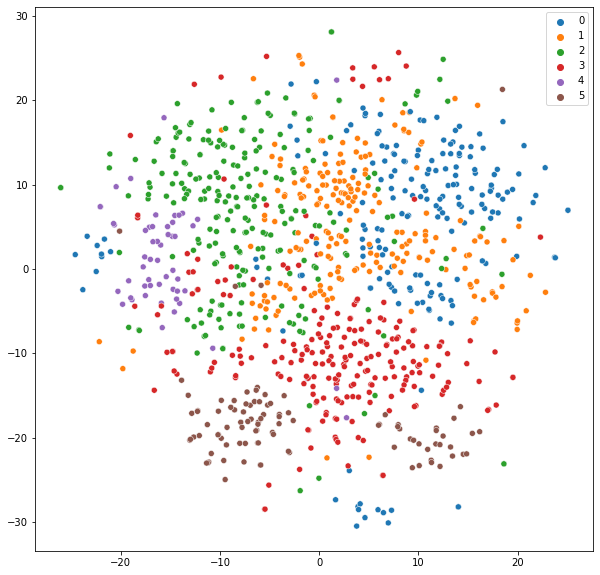

In [221]:
tsne_model_ = TSNE(learning_rate=200)
transformed = tsne_model_.fit_transform(df_pt)
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
plt.figure(figsize=(10, 10))
sns.scatterplot(data=transformed, x=x_axis, y=y_axis, hue=ac_model.labels_, palette="tab10")
plt.show()

Т.к. *DBSCAN* не сработал, а *Иерархическая кластеризация* показывает большие значения коэффициента силуета чем *kMeans*, считаем её **лучшим** алгоритмом для этого набора данных.

Также посмотрим улучшит ли результат понижение размерности. Используем по описанным выше причинам **tSNE**:

In [234]:
tsne_model_ = TSNE(n_components = 2, learning_rate=200)
transformed = tsne_model_.fit_transform(df_pt)
ac_model_transformed = AgglomerativeClustering(n_clusters = 6, linkage = 'ward')
ac_model_transformed.fit(transformed)
ac_model_transformed.labels_

array([1, 2, 3, ..., 0, 0, 1], dtype=int64)

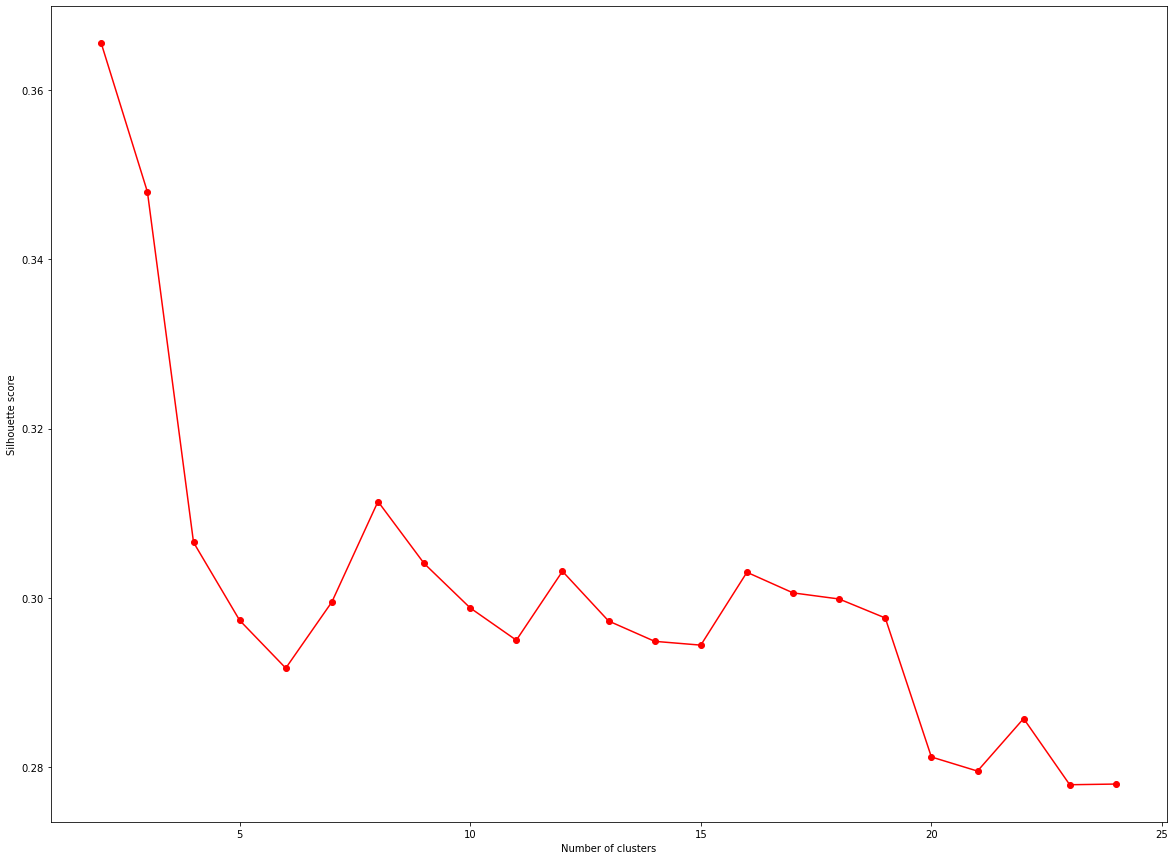

In [236]:
x = list(range(2, 25))
metric_values = []
for k in x:
    ac_model_transformed = AgglomerativeClustering(n_clusters = k)
    ac_model_transformed.fit(transformed) #fit_trasnform
    item = metrics.silhouette_score(transformed, ac_model_transformed.labels_, metric='euclidean')
    metric_values.append(item)

plt.figure(figsize=(20, 15))
plt.plot(x, metric_values, '-r')
plt.plot(x, metric_values, 'or')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

Теперь используем 8 кластеров:

In [238]:
ac_model_transformed = AgglomerativeClustering(n_clusters = 8, linkage = 'ward')
ac_model_transformed.fit(transformed)
metrics.silhouette_score(transformed, ac_model_transformed.labels_, metric='euclidean')

0.31138575

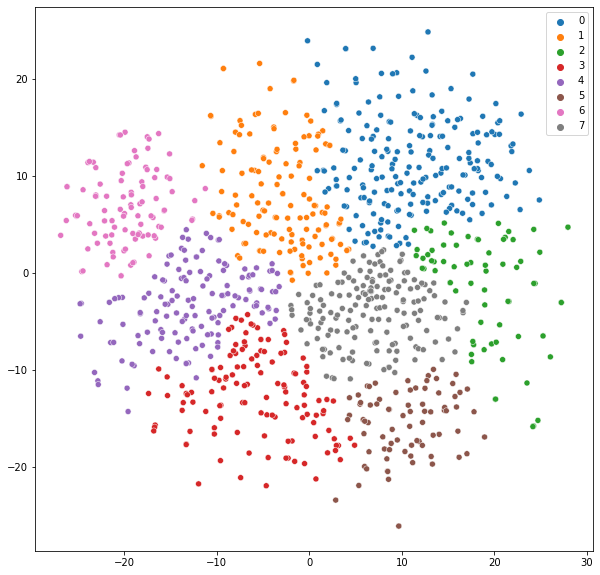

In [240]:
ac_labels = pd.Series(ac_model_transformed.labels_)
df_pt['labels'] = ac_labels
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
plt.figure(figsize=(10, 10))
sns.scatterplot(data=transformed, x=x_axis, y=y_axis, hue=ac_model_transformed.labels_, palette="tab10")
plt.show()

По изображениям можно увидеть, что понижение размерности практически полностью убрало выбросы и аномальные значения, кластеры имеют четкую границу.

Теперь подытожим все значения выбранной метрики по всем алгоритмам:

**kMeans**

In [226]:
metrics.silhouette_score(df_pt, kmeans_pt.labels_, metric='euclidean')

0.024380863418416682

**DBSCAN** -

**Hierarchical Clustering без понижения размерности**

In [273]:
metrics.silhouette_score(df_pt, ac_model.labels_, metric='euclidean')

0.033402549120477736

**Hierarchical Clustering с понижением размерности (tSNE)**

In [275]:
metrics.silhouette_score(transformed, ac_model_transformed.labels_, metric='euclidean')

0.31138575

Выходит, что иерархическая кластеризация (*AgglomerativeClustering*) с понижением размерности работает лучше всех.

Осталось у полученных групп попробовать найти интерпретацию - обобщить характерные черты.

In [261]:
for l in range(len(set(ac_labels))):
    print(f"\tPersonality group {l}:")
    print(df_pt.loc[df_pt['labels'] == l].loc[:, 'Daily events':'Internet usage'].mean().sort_values(ascending=False)[:5])
    print('\n')

	Personality group 0:
Borrowed stuff           4.315385
Keeping promises         4.211538
Reliability              4.192308
Compassion to animals    4.026923
Empathy                  3.996154
dtype: float64


	Personality group 1:
Compassion to animals    4.334783
Empathy                  4.295652
Friends versus money     4.208696
Judgment calls           4.191304
Keeping promises         4.086957
dtype: float64


	Personality group 2:
Cheating in school    4.107784
Internet usage        4.017964
Getting up            3.712575
Lying                 3.706587
Judgment calls        3.568862
dtype: float64


	Personality group 3:
Borrowed stuff           4.291262
Compassion to animals    4.233010
Public speaking          4.203883
God                      4.077670
Judgment calls           4.019417
dtype: float64


	Personality group 4:
Interests or hobbies    4.248447
Energy levels           4.229814
Cheating in school      4.186335
Happiness in life       4.130435
Judgment calls          4

Тут из интересного можно выделить следующее:
- 2 группу, которая с трудом встает в школу, много времени уделяет интернету и нечестно учится.
- 4 группу. Студенты всегда имеют много энергии, имеют много увлечений и счастливы по жизни ((вот бы таким стать))
- 0, 3 и 5 группы довольно сильно похожи между собой. Отвественные к чужим вещам студенты готовятся перед речами в обществе и любят животных.